In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
with open('results.json') as json_data:
    results= json.load(json_data)
    json_data.close()

In [3]:
dimensions = np.array(results["dimensions"])
Delta_gt = results["Delta_gt"]
sigma_gt = results["sigma_gt"]


In [4]:
def compute_mse(model_key, param_key):
    gt = Delta_gt if param_key == "Delta" else sigma_gt
    return [
        np.mean(np.sum((np.array(results[model_key][str(d)][param_key]) - np.array(gt[i]))**2)) 
        for i, d in enumerate(dimensions)
    ]

In [5]:
Delta_errors_VB = compute_mse("VB", "Delta") 
Delta_errors_HVAE1 = compute_mse("HVAE1", "Delta")
Delta_errors_HVAE10 = compute_mse("HVAE10", "Delta")
Delta_errors_IWHVAE = compute_mse("IWHVAE", "Delta")

sigma_errors_VB = compute_mse("VB", "sigma") 
sigma_errors_HVAE1 = compute_mse("HVAE1", "sigma")
sigma_errors_HVAE10 = compute_mse("HVAE10", "sigma")
sigma_errors_IWHVAE = compute_mse("IWHVAE", "sigma")



theta_errors_VB = [Delta_errors_VB[i] + sigma_errors_VB[i] for i in range(len(dimensions))]
theta_errors_HVAE1 = [Delta_errors_HVAE1[i] + sigma_errors_HVAE1[i] for i in range(len(dimensions))]
theta_errors_HVAE10 = [Delta_errors_HVAE10[i] + sigma_errors_HVAE10[i] for i in range(len(dimensions))]
theta_errors_IWHVAE = [Delta_errors_IWHVAE[i] + sigma_errors_IWHVAE[i] for i in range(len(dimensions))]

In [6]:
theta_errors_HVAE1,theta_errors_IWHVAE

([np.float64(14.70744876986236),
  np.float64(22.0594469988859),
  np.float64(18.013454830836306),
  np.float64(64.06660980608932),
  np.float64(80.67961710770666),
  np.float64(257.55610258158794),
  np.float64(481.10328705303675),
  np.float64(1083.295667533619),
  np.float64(1938.4994015857274),
  np.float64(3113.714904506543)],
 [np.float64(14.757120314397763),
  np.float64(22.167826079304717),
  np.float64(18.4296221865889),
  np.float64(63.30865034311802),
  np.float64(79.90574530203905),
  np.float64(257.9079475170906),
  np.float64(481.87226622616794),
  np.float64(1085.1876246229162),
  np.float64(1939.2034525409067),
  np.float64(3107.2502091944657)])

Text(0.5, 1.0, 'Evolution of the MSE on $\\theta$')

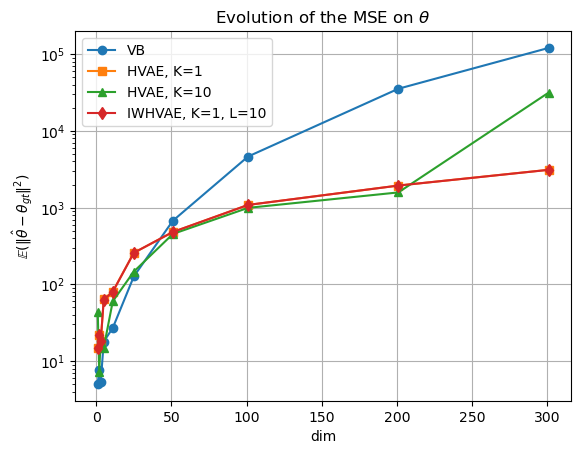

In [7]:
fig, ax = plt.subplots()
ax.plot(dimensions, theta_errors_VB, marker='o', label = "VB")
ax.plot(dimensions, theta_errors_HVAE1, marker='s', label = "HVAE, K=1")
ax.plot(dimensions, theta_errors_HVAE10, marker='^', label = "HVAE, K=10")
ax.plot(dimensions, theta_errors_IWHVAE, marker='d', label = "IWHVAE, K=1, L=10")
ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("dim")
ax.set_ylabel(r"$\mathbb{E}(\|\hat{\theta} - \theta_{gt}\|^2)$")
ax.set_title(r"Evolution of the MSE on $\theta$")

Text(0.5, 1.0, 'Evolution of the MSE on $\\Delta$')

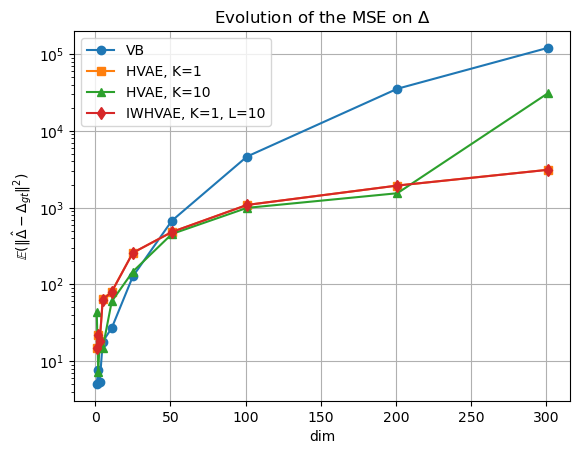

In [8]:
fig, ax = plt.subplots()
ax.plot(dimensions, Delta_errors_VB, marker = 'o', label = "VB")
ax.plot(dimensions, Delta_errors_HVAE1, marker = 's', label = "HVAE, K=1")
ax.plot(dimensions, Delta_errors_HVAE10, marker = '^', label = "HVAE, K=10")
ax.plot(dimensions, Delta_errors_IWHVAE, marker = 'd', label = "IWHVAE, K=1, L=10")
ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("dim")
ax.set_ylabel(r"$\mathbb{E}(\|\hat{\Delta} - \Delta_{gt}\|^2)$")
ax.set_title(r"Evolution of the MSE on $\Delta$")

Text(0.5, 1.0, 'Evolution of the MSE on $\\Sigma$')

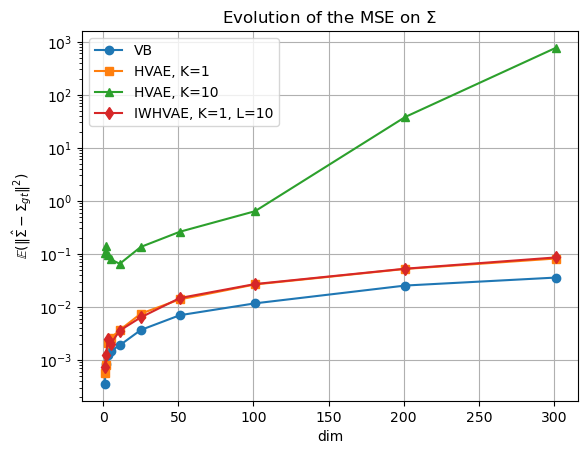

In [9]:
fig, ax = plt.subplots()
ax.plot(dimensions, sigma_errors_VB, marker = 'o', label = "VB")
ax.plot(dimensions, sigma_errors_HVAE1, marker = 's', label = "HVAE, K=1")
ax.plot(dimensions, sigma_errors_HVAE10, marker = '^', label = "HVAE, K=10")
ax.plot(dimensions, sigma_errors_IWHVAE, marker = 'd', label = "IWHVAE, K=1, L=10")
ax.set_yscale("log")
ax.grid()
ax.legend()
ax.set_xlabel("dim")
ax.set_ylabel(r"$\mathbb{E}(\|\hat{\Sigma} - \Sigma_{gt}\|^2)$")
ax.set_title(r"Evolution of the MSE on $\Sigma$")